In [2]:
#Kartik Sharma

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
data = pd.read_csv('playstore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Description of data


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
print(f"Missing Values :\n{data.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [9]:
#Drop records where rating is missing since rating is our target/study variable
data.dropna(how='any',subset=['Rating'], inplace=True, axis = 0)
data['Rating'].isnull().sum()

0

In [10]:
#Check the null values for the Android Ver column.#
print(f"Missing Values :\n{data['Android Ver'].isnull().sum()}")
data.loc[data['Android Ver'].isnull()]
# Last record have(10472) wierd category and missing content ranking also and type is also 0 which is present in other 2 recors

Missing Values :
3


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
data.drop( [10472],inplace = True)

In [12]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [13]:
#iii. Replace remaining missing values with the mode
data['Android Ver'].fillna(data['Android Ver'].mode()[0],inplace=True)

In [14]:
#c. Current ver – replace with most common value
data['Current Ver'].fillna(data['Current Ver'].mode()[0],inplace=True)

## 2. Data clean up – correcting the data types
### a. Which all variables need to be brought to numeric types?
### b. Price variable – remove doolar sign and convert to float
### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
### d. Convert all other identified columns to numeric

In [15]:
#a. Which all variables need to be brought to numeric types?
# Reviews, install and price have to be changed from obj into numeric

In [16]:
#b. Price variable – remove $ sign and convert to float
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].astype(int)
data['Price'] = data['Price'].str.replace('$','').astype(float)
data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','').astype(int)



In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 914.6+ KB


## 3. Sanity checks – check for the following and handle accordingly
### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
### i. Are there any such records? Drop if so.
### b. Reviews should not be more than installs as only those who installed can review the app.
### i. Are there any such records? Drop if so


In [18]:
#a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [19]:
pd.unique(data[['Rating']].values.ravel())


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [20]:
#No value that conflict.All in range

In [21]:
#b. Reviews should not be more than installs as only those who installed can review the app.
data.drop(data[data['Reviews'] > data['Installs']].index, inplace = True)
data.loc[data.Rating < 0] & data.loc[data.Rating >5 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4. Identify and handle outliers – 
### a. Price column
#### i. Make suitable plot to identify outliers in price
#### ii. Do you expect apps on the play store to cost 200? Check out these cases
#### iii. After dropping the useless records, make the suitable plot again to identify  outliers
#### iv. Limit data to records with price < 30
### b. Reviews column
#### i. Make suitable plot
#### ii. Limit data to apps with < 1 Million reviews
### c. Installs
### i. What is the 95th percentile of the installs?
### ii. Drop records having a value more than the 95th percentile

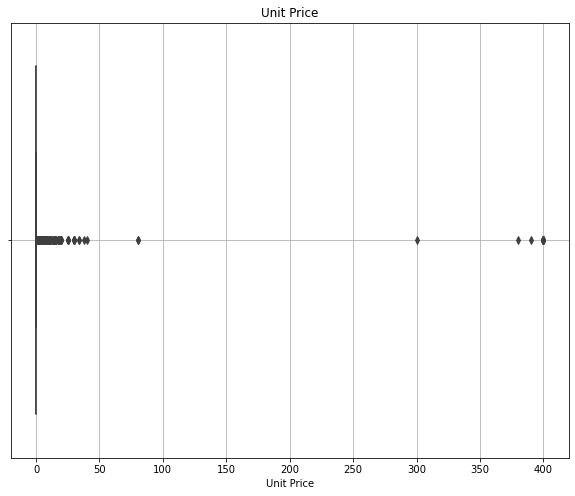

In [22]:
plt.subplots(figsize=(10,8))
sns.boxplot(data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [23]:
# ii. Do you expect apps on the play store to cost 200? Check out these cases
print("Yes ,I expect apps to cost more than $200")
data.loc[data.Price>=200]

Yes ,I expect apps to cost more than $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


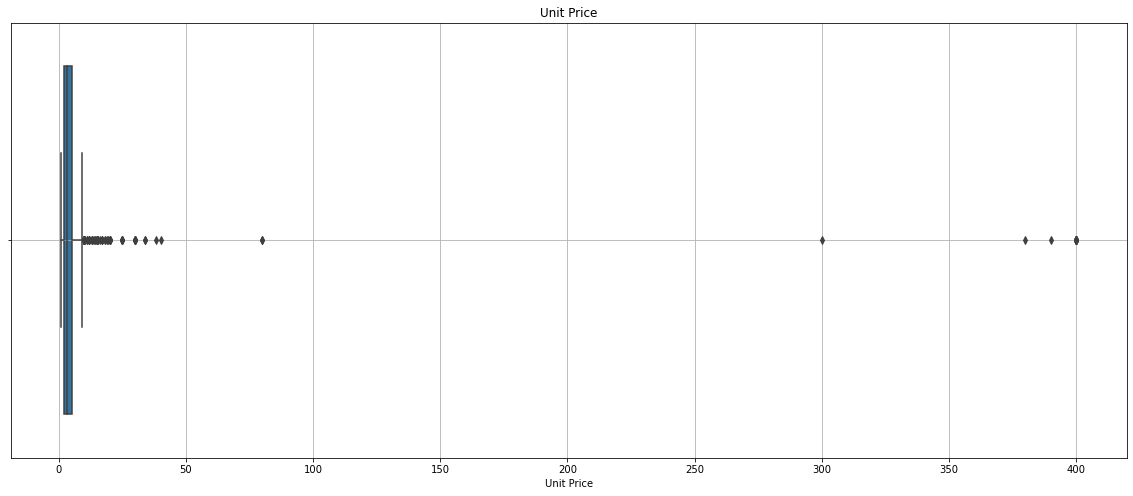

In [24]:
#iii. After dropping the useless records, make the suitable plot again to identify  outliers
usful_data = data[data['Price'] != 0]
#As price 0 is not usefull for predicting prices
plt.subplots(figsize=(20,8))
sns.boxplot(usful_data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [25]:
#iv. Limit data to records with price < 30
data.drop(data[data['Price']>=30].index, inplace =True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
#b. Reviews column
# i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410221801
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17547629
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12866394
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585000
AUTO_AND_VEHICLES         1163630
LIBRA

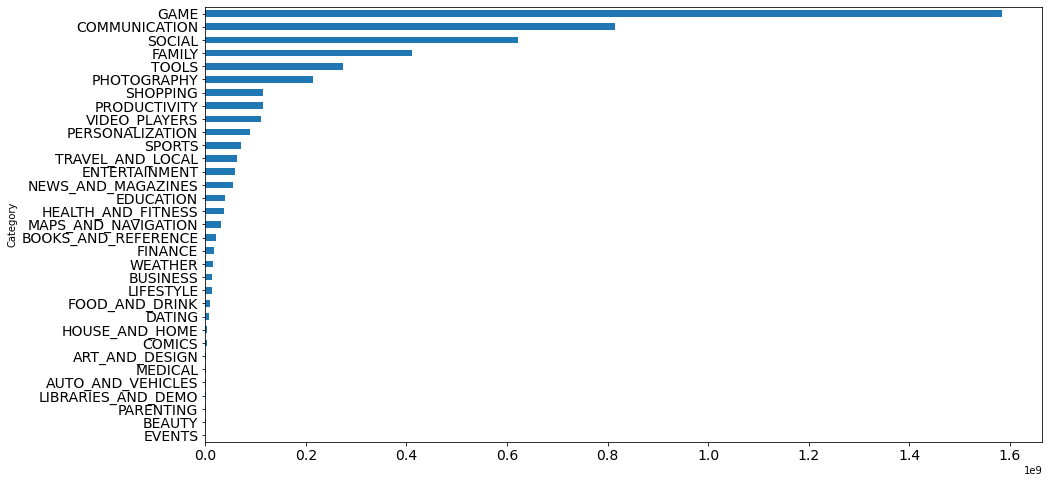

In [27]:
total=data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()


In [28]:
#ii. Limit data to apps with < 1 Million reviews

data.drop(data[data['Reviews']>1000000].index, inplace = True)
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
# Installs
# What is the 95th percentile of the installs?
# Drop records having a value more than the 95th percentile

In [30]:
percentile= data.Installs.quantile(0.95)
print(percentile)
temp = data[data['Installs']>percentile].index

10000000.0


In [31]:
data.drop(data[data['Installs']>percentile].index,inplace=True)
print(" Col Dropped: ", temp.value_counts().sum())

 Col Dropped:  199


## Data analysis to answer business questions
### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#### a. How do you explain this?
#### b. What is the implication of this on your analysis?
### 6. What are the top Content Rating values?
#### a. Are there any values with very few records?
#### b. If yes, drop those as they won’t help in the analysis
### 7. Effect of size on ratinga. Make a joinplot to understand the effect of size on rating
#### b. Do you see any patterns?
#### c. How do you explain the pattern?


In [32]:
print("The skewdness of distributuion is ", data['Rating'].skew())
print("Mean of distribution is {} \n Mode of the distribution is {} \n median of distribution is {}" .format(data.Rating.mean(),data.Rating.mode(),data.Rating.median()))

The skewdness of distributuion is  -1.7434270330647985
Mean of distribution is 4.170800237107298 
 Mode of the distribution is 0    4.3
dtype: float64 
 median of distribution is 4.3


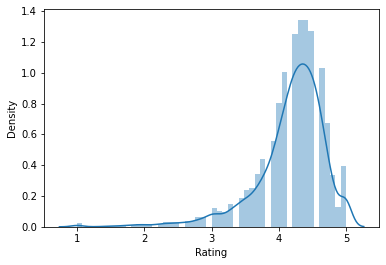

In [33]:
sns.distplot(data['Rating'])
plt.show()

In [34]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [35]:
temp1=[]
for i in data["Content Rating"]:
    temp1.append(i.replace('Adults only 18+','NaN').replace('Unrated','NaN'))
    
data['Content Rating']= temp1

In [36]:
temp2= data[data["Content Rating"] == 'NaN'].index
data.drop(temp2, inplace=True)
print("Coln dropped: ", temp2.value_counts().sum())

Coln dropped:  4


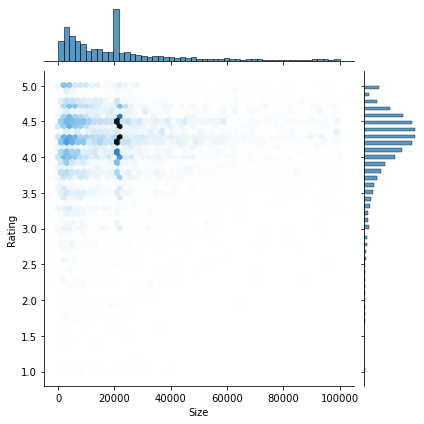

In [37]:
sns.jointplot(x=data['Size'],y=data['Rating'],data=data,kind='hex')
plt.show()

In [38]:
#We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000(40 mb).
#Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store

In [39]:
#Generally on increasing Rating, Size of App also increases.
#But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.



## 8. Effect of price on rating
### a. Make a jointplot (with regression line)
### b. What pattern do you see?
### c. How do you explain the pattern?
### d. Replot the data, this time with only records with price > 0 
### e. Does the pattern change?
### f. What is your overall inference on the effect of price on the rating

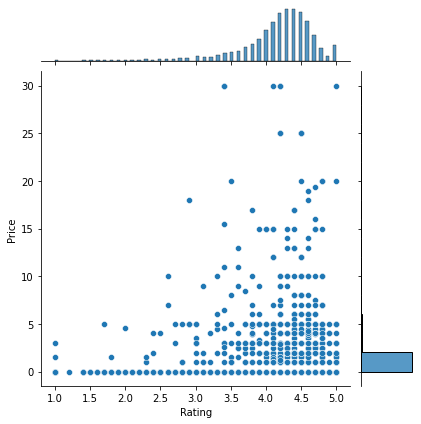

In [40]:
sns.jointplot(x ="Rating" , y = "Price" ,data = data)
plt.show()

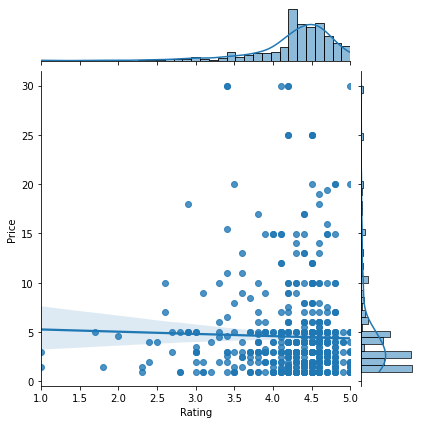

In [41]:
#d. Replot the data, this time with only records with price > 0
Price_greaterthan_zero = data[data['Price'] > 0]
sns.jointplot(x ="Rating" , y = "Price" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

In [42]:
#There is no such pattern which suggest increasing price is giving higher or lower raatings.
#Higher price apps are genreally having very consitent rating of 4

## 9. Look at all the numeric interactions together – 
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

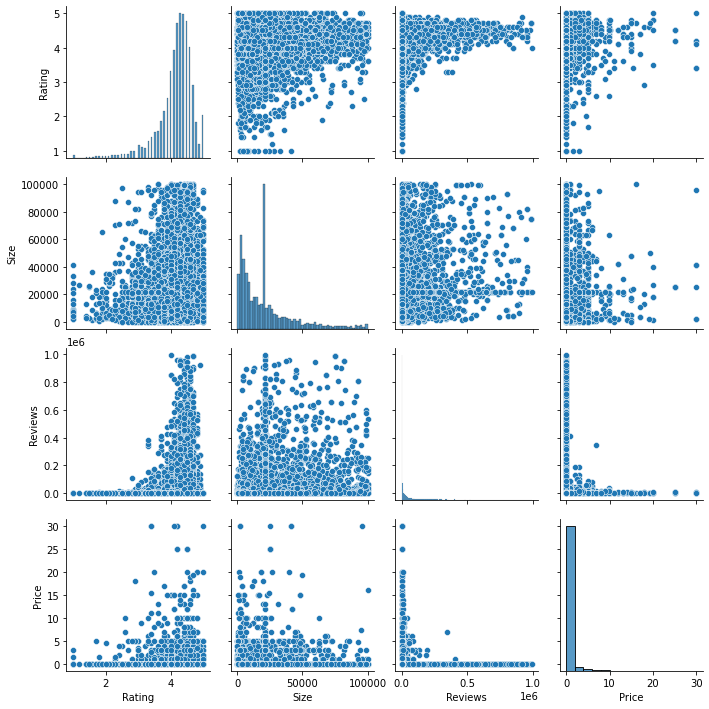

In [43]:
sns.pairplot(data,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

## 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating
### b. Which metric would you use? Mean? Median? Some other quantile?
### c. Choose the right metric and plot

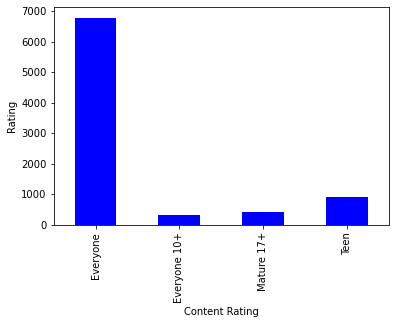

In [44]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

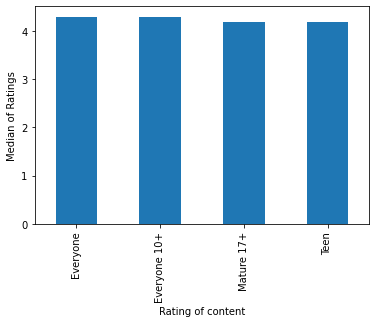

In [46]:
a = data['Rating'].groupby(data['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Median of Ratings')
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
### a. Create 5 buckets (20% records in each) based on Size
### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
### c. Make a heatmap of this
#### i. Annotated
#### ii. Greens color map
### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some

In [47]:
bins=[0,20000,40000,60000,80000,100000]
data['Bucket Size'] = pd.cut(data['Size'],bins, labels =['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [48]:
pd.pivot_table(data, values='Rating', index= 'Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [49]:
temp3 =pd.pivot_table(data, values='Rating', index= 'Bucket Size', columns='Content Rating',aggfunc= lambda x: np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


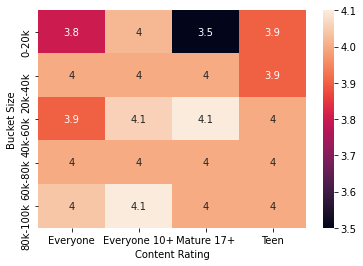

In [50]:
sns.heatmap(temp3, annot = True)
plt.show()

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

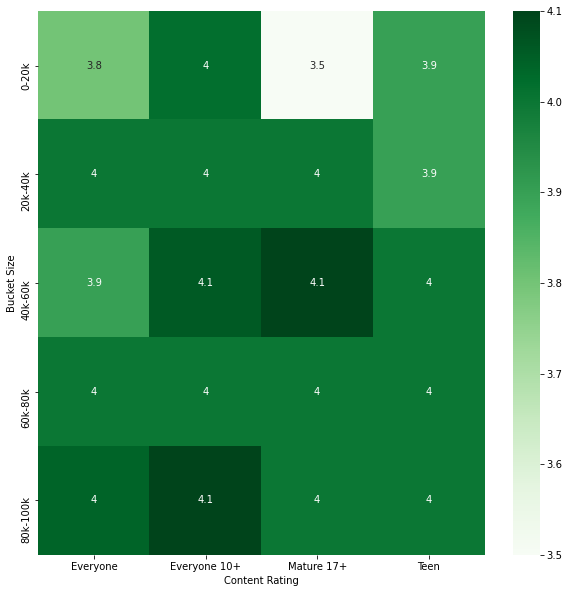

In [51]:
plt.subplots(figsize=(10,10))

sns.heatmap(temp3, annot =True, cmap ='Greens',)